In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


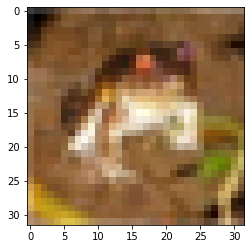

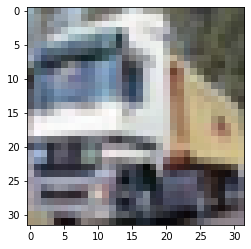

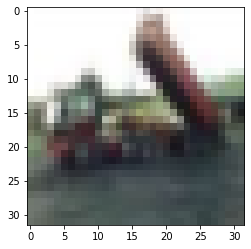

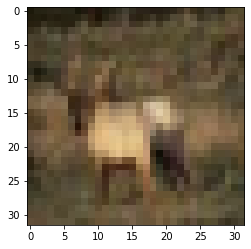

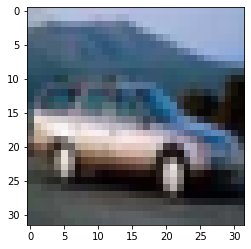

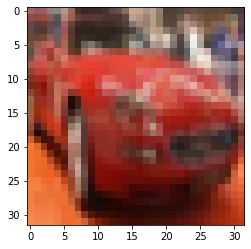

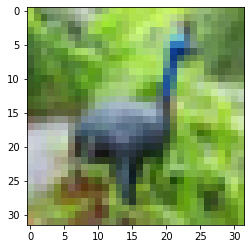

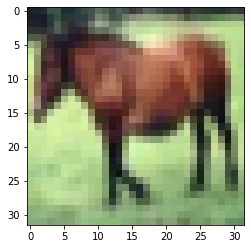

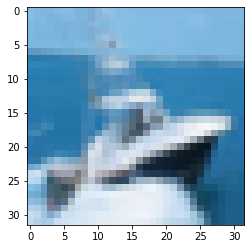

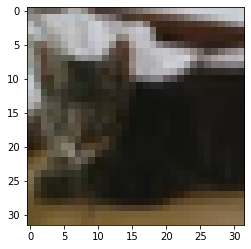

In [0]:
i=1
for i in range(10):
    plt.imshow(x_train[i])
    plt.show()

In [0]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [0]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [0]:
y_train.shape

(50000, 10)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

W0713 21:11:16.222381   884 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:63: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 21:11:17.124542   884 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:492: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 21:11:17.502353   884 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3630: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 21:11:17.826379   884 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3458: The name tf.nn.max_pool is deprecated. P

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0713 21:11:26.358563   884 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 21:11:26.406565   884 deprecation.py:506] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:2880: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0713 21:11:26.422567   884 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:2884: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
model.fit(x_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=2,
          validation_data=(x_test, y_test))

W0713 21:11:44.024093   884 deprecation.py:323] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 21:11:44.360929   884 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:953: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0713 21:11:44.385367   884 deprecation.py:506] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:675: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance wi

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 363s - loss: 1.5982 - acc: 0.4164 - val_loss: 1.2495 - val_acc: 0.5541
Epoch 2/10
 - 328s - loss: 1.2079 - acc: 0.5694 - val_loss: 1.0439 - val_acc: 0.6247
Epoch 3/10
 - 637s - loss: 1.0335 - acc: 0.6371 - val_loss: 0.8983 - val_acc: 0.6887
Epoch 4/10
 - 512s - loss: 0.9135 - acc: 0.6770 - val_loss: 0.8409 - val_acc: 0.7065
Epoch 5/10
 - 304s - loss: 0.8339 - acc: 0.7057 - val_loss: 0.7627 - val_acc: 0.7339
Epoch 6/10
 - 302s - loss: 0.7752 - acc: 0.7270 - val_loss: 0.7279 - val_acc: 0.7496
Epoch 7/10
 - 299s - loss: 0.7219 - acc: 0.7489 - val_loss: 0.6719 - val_acc: 0.7662
Epoch 8/10
 - 301s - loss: 0.6840 - acc: 0.7608 - val_loss: 0.6711 - val_acc: 0.7718
Epoch 9/10
 - 311s - loss: 0.6445 - acc: 0.7732 - val_loss: 0.6372 - val_acc: 0.7813
Epoch 10/10
 - 318s - loss: 0.6104 - acc: 0.7836 - val_loss: 0.6413 - val_acc: 0.7816


In [0]:
ans=model.predict(x_test,batch_size=16,verbose=1)

10000/10000 [==============================] - 24s 2ms/step


In [0]:
np.argmax(ans[0])

3

In [0]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [0]:
dict={
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

In [0]:
for i in range(len(ans)):
    print(np.argmax(ans[i]), np.argmax(y_test[i]))

3 3
8 8
8 8
0 0
6 6
6 6
1 1
6 6
3 3
1 1
4 0
9 9
5 5
7 7
9 9
8 8
5 5
7 7
8 8
6 6
7 7
0 0
4 4
9 9
4 5
4 2
4 4
0 0
9 9
6 6
6 6
5 5
4 4
6 5
9 9
1 2
4 4
1 1
9 9
5 5
4 4
6 6
5 5
6 6
0 0
9 9
5 3
9 9
7 7
2 6
9 9
8 8
6 0
3 3
8 8
8 8
7 7
5 7
3 4
5 6
7 7
5 3
6 6
3 3
6 6
2 2
1 1
2 2
5 3
7 7
8 2
3 6
8 8
8 8
0 0
2 2
9 9
3 3
5 3
8 8
8 8
1 1
1 1
7 7
2 2
7 5
2 2
4 7
8 8
9 9
0 0
6 3
8 8
6 6
4 4
6 6
6 6
0 0
0 0
5 7
7 4
5 5
6 6
3 3
1 1
1 1
8 3
6 6
8 8
7 7
4 4
0 0
6 6
2 2
1 1
3 3
0 0
4 4
6 2
5 7
8 8
3 3
1 1
2 2
8 8
2 0
0 8
3 3
6 5
2 2
4 4
1 1
8 8
9 9
1 1
2 2
9 9
7 7
2 2
8 9
6 6
5 5
6 6
5 3
8 8
7 7
6 6
5 2
5 5
2 2
8 8
9 9
6 6
0 0
0 0
5 5
2 2
9 9
3 5
4 4
0 2
1 1
6 6
6 6
0 8
4 4
8 8
4 4
9 5
4 0
9 9
9 9
9 9
8 8
9 9
9 9
3 3
7 7
5 5
9 0
0 0
5 5
2 2
2 2
3 3
8 8
6 6
3 3
3 4
8 0
5 5
8 8
0 0
1 1
7 7
2 2
8 8
8 8
7 7
8 8
5 5
1 1
8 8
7 7
1 1
3 3
0 0
5 5
7 7
9 9
5 7
9 4
5 5
9 9
8 8
0 0
7 7
9 9
0 8
2 2
7 7
6 6
9 9
4 4
4 3
9 9
4 6
2 4
3 7
6 6
5 5
1 1
5 5
8 8
8 8
0 0
4 4
9 0
3 5
5 5
1 1
1 1
8 8
9 9
0 0
2 3
1 1
8 9
2 2
2 2


0 0
1 1
1 1
8 8
4 4
5 5
5 3
9 1
2 2
4 4
8 8
1 9
8 8
1 1
3 7
4 2
7 7
2 2
2 3
6 2
6 6
7 7
9 9
4 4
0 0
1 1
0 0
4 4
5 5
0 0
8 8
0 0
4 7
4 6
1 1
8 0
8 8
5 5
9 9
4 2
5 5
5 4
5 4
9 9
0 0
6 6
1 1
2 2
5 5
1 1
6 6
7 7
1 1
5 5
8 8
8 8
0 0
5 3
9 9
4 4
0 0
6 3
4 4
9 9
2 2
2 4
3 3
0 0
6 6
6 4
3 5
6 6
6 6
7 7
8 8
4 4
8 8
8 8
4 3
6 2
8 8
0 0
0 2
3 5
6 6
8 8
7 7
8 8
9 9
9 9
0 0
6 6
6 6
8 8
1 1
1 1
7 7
4 4
4 4
2 2
5 3
6 6
9 9
0 6
2 2
5 4
1 1
8 8
4 2
4 3
1 1
3 6
8 8
6 6
8 8
5 5
9 9
0 0
1 1
0 0
0 2
9 9
2 2
9 9
0 0
9 9
7 7
8 8
5 5
0 0
6 6
6 6
8 8
1 1
6 6
5 5
8 8
7 7
9 9
2 2
1 1
6 6
4 7
5 5
6 6
3 3
1 0
9 9
8 8
1 9
5 5
8 9
9 9
8 9
3 3
2 6
6 4
4 4
8 8
8 8
1 1
9 7
0 3
0 0
6 6
1 2
4 4
1 8
2 2
2 2
9 9
2 2
2 2
1 9
7 7
4 4
1 1
5 9
1 1
3 4
3 3
8 5
2 3
8 8
9 9
5 3
6 6
2 2
1 0
5 8
9 9
6 0
5 5
1 1
5 5
8 8
4 2
1 1
8 2
5 3
2 2
4 4
8 8
6 4
0 0
6 6
4 4
4 2
9 9
8 8
4 4
7 7
6 6
5 2
4 4
7 7
7 7
6 6
4 4
0 2
2 2
3 3
2 2
3 4
4 9
0 0
0 0
9 9
6 6
5 5
8 8
7 5
2 2
4 4
8 8
8 8
6 6
4 4
5 5
7 7
6 6
5 3
2 7
9 0
4 4
0 0
9 5
8 8
5 2
8 8


5 5
1 1
9 9
7 7
9 9
1 1
1 8
4 4
2 2
1 1
4 6
4 4
3 3
8 0
1 1
4 4
9 8
3 6
1 1
7 7
1 1
5 3
4 5
4 4
5 3
3 3
9 9
7 7
8 8
2 2
5 5
3 5
4 4
5 5
4 4
5 5
7 7
4 2
5 5
3 5
1 1
5 7
7 7
8 8
3 3
6 6
0 0
2 2
5 5
2 2
2 3
7 7
4 4
5 2
1 1
6 6
8 8
6 6
8 8
3 3
2 2
7 7
5 7
9 9
7 7
1 1
4 4
4 7
5 4
6 6
1 1
7 7
3 3
0 0
8 0
6 6
2 6
8 8
6 6
6 6
0 0
3 3
4 4
7 7
4 4
8 9
4 4
9 9
1 9
3 3
4 4
1 1
4 4
8 0
3 3
7 7
1 1
2 2
6 2
8 8
4 4
7 7
8 8
5 5
5 5
6 6
2 5
6 6
0 0
6 6
4 4
9 9
4 3
2 2
7 7
3 3
8 8
3 3
9 9
4 4
1 1
6 6
9 9
9 9
4 4
5 3
9 9
8 8
1 1
3 6
9 9
5 5
9 9
0 0
9 9
7 7
5 2
4 2
4 4
6 2
6 6
6 4
9 8
1 1
9 9
5 5
6 6
5 5
1 1
8 8
6 6
6 6
0 7
6 6
5 5
1 0
3 2
9 7
6 6
1 1
2 2
8 3
1 1
6 6
4 4
9 9
0 0
2 3
9 9
1 1
0 0
5 5
3 3
1 1
6 6
9 9
8 8
9 9
0 0
6 6
1 1
6 6
2 2
3 3
5 5
6 6
1 9
0 0
7 7
2 2
2 4
8 0
3 3
4 6
8 8
6 6
9 9
9 1
9 9
0 0
1 6
2 4
3 5
9 9
5 5
2 4
1 1
9 9
7 2
0 0
7 7
3 3
5 5
1 1
8 8
5 3
0 0
5 5
0 2
0 8
8 8
4 3
9 9
6 6
0 0
9 3
5 5
3 3
4 4
1 1
4 5
0 0
5 7
3 3
9 9
4 4
5 5
3 3
1 1
4 4
6 2
5 4
9 9
9 9
7 7
1 1
7 7
0 0
1 1
0 2


3 3
1 1
7 7
9 2
9 9
8 8
0 9
2 4
6 6
0 0
9 9
5 4
0 0
4 4
6 6
3 2
1 1
1 3
0 0
0 8
5 5
6 6
0 0
3 3
4 4
6 6
9 9
1 5
7 7
5 9
6 0
5 3
6 6
5 5
9 7
8 0
5 5
1 1
2 2
2 2
9 9
4 7
0 0
0 0
1 1
4 4
4 4
5 5
5 5
9 9
6 6
3 3
6 6
0 2
6 6
9 9
3 3
3 2
3 3
9 2
4 4
9 9
7 5
2 2
1 1
6 6
6 6
4 4
7 7
6 6
7 3
6 3
2 8
1 1
4 4
6 6
4 4
4 4
2 5
6 6
6 2
0 0
5 5
2 2
5 7
5 5
2 2
5 5
0 2
5 5
9 9
0 0
6 6
7 7
9 9
8 8
5 3
2 2
1 1
4 4
2 3
4 4
5 5
5 5
6 6
8 8
4 6
0 0
8 8
9 9
0 8
0 0
0 7
7 7
6 6
6 6
0 7
5 5
9 9
8 8
5 7
9 9
5 5
6 6
0 0
4 4
8 8
3 2
5 0
9 9
1 1
5 3
9 9
1 8
0 3
7 7
4 4
4 5
0 0
2 2
1 1
1 9
1 1
8 0
5 5
8 8
4 4
7 7
3 3
1 1
4 4
3 5
4 3
1 1
0 0
5 8
8 8
8 8
8 2
1 1
6 3
7 7
1 3
9 1
6 6
9 9
1 1
3 6
0 0
7 7
7 7
1 1
3 3
3 3
5 3
1 1
0 0
2 2
7 7
1 1
2 2
2 2
9 9
6 6
6 3
5 5
9 9
4 4
8 8
0 0
4 4
8 8
0 0
9 1
3 3
5 7
0 0
4 4
0 7
0 4
8 8
6 6
1 4
3 3
9 9
8 8
2 2
2 2
8 8
3 3
1 1
1 1
2 2
8 8
2 2
6 6
9 9
6 4
8 8
4 4
2 4
1 1
5 5
2 2
6 6
9 9
0 2
0 0
7 7
1 1
8 8
9 9
5 3
9 9
9 9
0 0
7 7
7 7
3 5
3 4
8 2
6 6
4 4
3 5
7 7
7 7
8 8
7 7
4 2
6 6


7 7
6 6
5 3
2 2
5 5
9 9
0 0
5 5
9 9
9 9
8 8
7 7
7 7
4 4
8 8
6 6
4 5
2 2
5 3
1 1
0 0
4 4
1 1
1 8
8 8
4 4
9 9
4 4
4 4
3 3
3 3
9 9
2 2
0 0
1 1
1 1
8 8
4 4
4 4
8 8
3 3
5 2
9 9
5 5
7 7
6 6
6 2
5 5
4 4
7 7
3 3
3 3
9 9
0 0
1 1
5 5
9 9
5 3
0 7
6 6
0 0
4 4
2 2
2 2
5 5
6 6
3 3
8 8
9 9
3 5
6 6
1 1
4 4
5 5
4 4
6 6
7 7
2 2
8 1
9 0
2 2
0 0
4 4
9 9
8 8
8 8
9 9
1 1
1 1
5 5
0 0
0 0
8 8
7 7
1 1
7 7
4 4
5 5
4 4
5 3
3 3
0 2
0 0
6 6
6 6
0 0
1 1
3 3
9 9
8 8
3 3
7 7
8 8
8 9
4 4
8 8
9 9
0 0
1 9
7 7
1 1
6 6
2 2
9 9
5 5
2 6
9 9
5 3
9 9
8 8
7 7
7 7
9 1
6 6
8 5
3 3
9 1
3 3
1 1
2 2
5 7
1 1
8 8
2 2
0 0
9 9
0 7
9 9
8 8
8 8
6 6
7 7
5 3
7 7
1 1
6 3
9 9
1 0
9 9
5 3
6 6
4 7
0 2
5 7
3 3
0 0
5 5
9 9
7 7
5 5
5 5
4 0
6 6
5 5
1 1
8 8
6 2
7 7
4 5
9 9
0 0
0 0
0 0
8 8
8 8
4 7
5 3
7 7
8 8
9 9
3 3
7 7
9 9
7 7
8 8
7 7
9 9
8 8
5 5
4 4
8 8
7 3
7 7
3 6
5 3
8 8
2 2
9 1
9 9
5 5
5 7
9 3
9 9
5 5
7 5
8 8
7 7
3 3
6 5
4 3
5 5
9 9
7 7
6 6
4 7
4 3
6 6
4 4
5 3
9 9
4 4
2 2
1 1
9 9
6 6
0 0
5 2
6 6
7 7
4 4
7 7
9 9
0 0
9 7
4 4
5 3
5 5
3 3
1 1
1 1


In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 15s 1ms/step
Test loss: 0.6413080701828003
Test accuracy: 0.7816


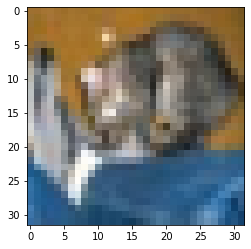

cat


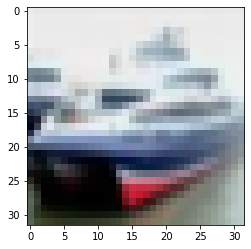

ship


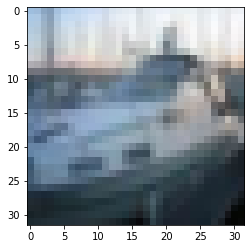

ship


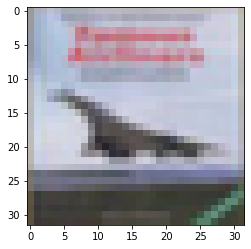

airplane


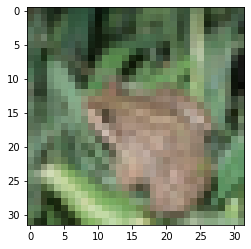

frog


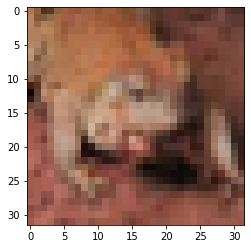

frog


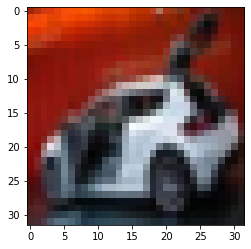

automobile


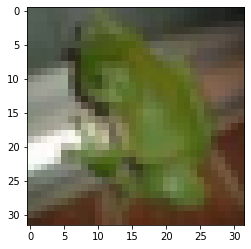

frog


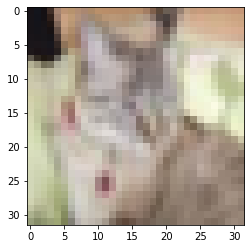

cat


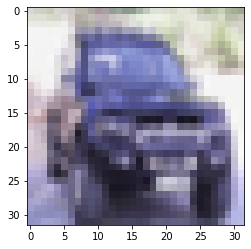

automobile


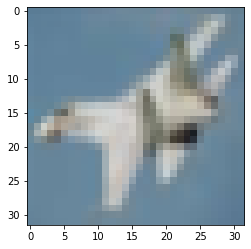

deer


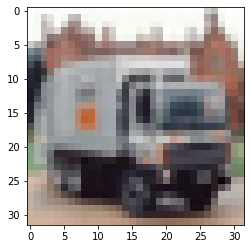

truck


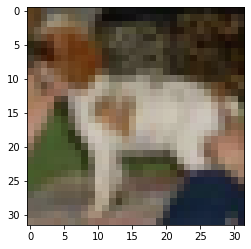

dog


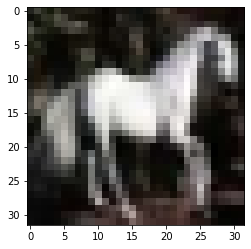

horse


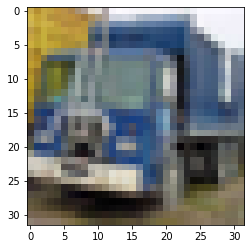

truck


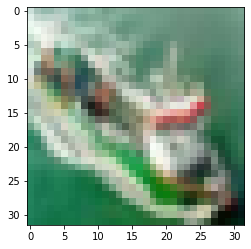

ship


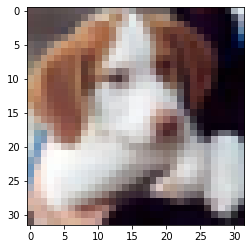

dog


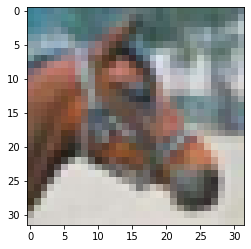

horse


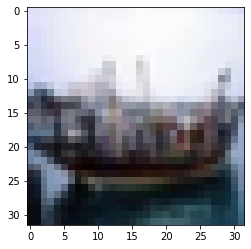

ship


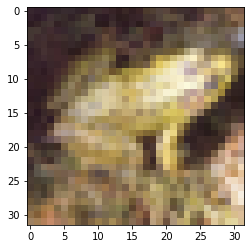

frog


In [0]:
for i in range(20):
    plt.imshow(x_test[i])
    plt.show()
    print(dict[np.argmax(ans[i])])